In [56]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('Corona.csv') 
df.head(7)

,fever,bodypain,age,runnynose,diffbreath,infected
0,99.329862,0,26,1,-1,0
1,98.115263,1,61,1,0,1
2,99.918088,1,13,0,-1,0
3,101.344456,1,55,1,0,1
4,100.056678,1,37,0,1,0
5,100.667482,0,33,0,-1,0
6,100.277243,1,38,1,1,0


In [57]:
df['fever']= df['fever'].astype(int)
df

,fever,bodypain,age,runnynose,diffbreath,infected
0,99,0,26,1,-1,0
1,98,1,61,1,0,1
2,99,1,13,0,-1,0
3,101,1,55,1,0,1
4,100,1,37,0,1,0
...,...,...,...,...,...,...
1994,101,1,33,1,-1,1
1995,101,1,38,0,1,1
1996,99,1,76,0,-1,1
1997,98,1,62,1,-1,1


In [58]:

df.shape

(1999, 6)

In [59]:
df['infected'].value_counts()

1    1007
0     992
Name: infected, dtype: int64

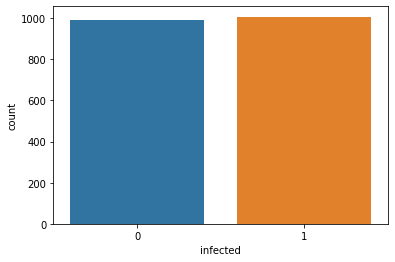

In [60]:
sns.countplot(df['infected'],label="Count")

In [61]:
df.dtypes

fever         int32
bodypain      int64
age           int64
runnynose     int64
diffbreath    int64
infected      int64
dtype: object

In [62]:
df['fever'] = df['fever'].astype(int)

In [63]:
X = df.iloc[:, :-1].values 
Y = df.iloc[:, -1].values 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [65]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.70767536,  0.99687792,  0.75255557,  1.03630592,  1.24274063],
       [ 1.42468564, -1.00313186, -1.32825286, -0.96496602, -1.21052143],
       [-0.70767536,  0.99687792,  0.65577378,  1.03630592,  1.24274063],
       ...,
       [-0.70767536,  0.99687792,  0.75255557,  1.03630592,  0.0161096 ],
       [-1.41846237, -1.00313186, -1.52181644, -0.96496602, -1.21052143],
       [-1.41846237,  0.99687792, -0.45721678, -0.96496602,  1.24274063]])

In [66]:
def models(X_train,Y_train):
    
    #Using KNeighborsClassifier 
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
  
    #print model accuracy on the training data.
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  
    return knn

In [67]:
model = models(X_train,Y_train)

[1]K Nearest Neighbor Training Accuracy: 0.6823014383989994


In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model KNN Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[ 99  82]
 [120  99]]
Model KNN Testing Accuracy = "0.495!"



In [69]:
# After 5-fold Cross Validation:

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), X_train, Y_train, cv=5)
print("K Nearest Neighbor Classifier: ", knn_cv)

K Nearest Neighbor Classifier:  [0.540625   0.478125   0.5        0.521875   0.49216301]


In [72]:
knn_cv_average = np.average(knn_cv)
print("K Nearest Neighbor Classifier Accuracy: ", knn_cv_average)

K Nearest Neighbor Classifier Accuracy:  0.5065576018808777


In [73]:

import pickle
with open('corona_detection_model_KNN.pickle','wb') as f:
    pickle.dump(model,f)

In [74]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("Corona_detection_columns.json","w") as f:
    f.write(json.dumps(columns))